In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

rajvichare_boat_detection_v3i_yolov8_path = kagglehub.dataset_download('rajvichare/boat-detection-v3i-yolov8')
rajvichare_ship_data_path = kagglehub.dataset_download('rajvichare/ship-data')
rajvichare_ship2data_path = kagglehub.dataset_download('rajvichare/ship2data')

print('Data source import complete.')


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.2/876.2 kB 16.5 MB/s eta 0:00:00a 0:00:01


In [ ]:
from ultralytics import YOLO
import os
from PIL import Image
import yaml
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!nvidia-smi

Fri Oct 18 13:14:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             13W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# count images per class
def count_images_per_class(labels_dir):
    images_per_class = {}

    # read each line in all txt files
    for filename in os.listdir(labels_dir):
        with open(os.path.join(labels_dir, filename), 'r') as file:
            lines = file.readlines()

        # count the class in the line
        for line in lines:
            class_name = line.split()[0]
            images_per_class[class_name] = images_per_class.get(class_name, 0) + 1

    return images_per_class

In [ ]:
labels_dir='/kaggle/input/boat-detection-v3i-yolov8/train/labels'
images_per_class = count_images_per_class(labels_dir)
print("Images per class:", images_per_class)

Images per class: {'0': 1523}


In [ ]:
# load the yaml file
with open('/kaggle/input/boat-detection-v3i-yolov8/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

In [ ]:
# set the root directory
ROOT_DIR = '/kaggle/input/MyDrive/Boat_Detection.v3i.yolov8'

In [ ]:
#loading a YOLOv8 pre-trained model
pt_model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 78.6MB/s]


In [ ]:
#training the model on my custom dataset
my_model = pt_model.train(data=os.path.join(ROOT_DIR, "/kaggle/input/boat-detection-v3i-yolov8/data.yaml"), epochs=5)

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/boat-detection-v3i-yolov8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]
2024-10-18 13:14:57,666	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-18 13:14:58,623	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 65.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/boat-detection-v3i-yolov8/train/labels... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:04<00:00, 308.08it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/boat-detection-v3i-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/boat-detection-v3i-yolov8/valid/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:01<00:00, 128.88it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/boat-detection-v3i-yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.32G      1.124      2.047      1.394         35        640: 100%|██████████| 94/94 [00:17<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        150        325      0.972      0.126      0.381      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.35G      1.156      1.457      1.385         32        640: 100%|██████████| 94/94 [00:15<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]

                   all        150        325      0.716      0.409      0.446       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.27G      1.176      1.267      1.383         28        640: 100%|██████████| 94/94 [00:15<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]

                   all        150        325      0.668      0.468      0.492       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.27G      1.098      1.103      1.326         28        640: 100%|██████████| 94/94 [00:15<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]

                   all        150        325      0.709      0.443      0.501      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.26G      1.049       1.01      1.301         22        640: 100%|██████████| 94/94 [00:15<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        150        325      0.726      0.554      0.582      0.372



5 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]


                   all        150        325      0.727      0.551      0.581      0.372
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▇█▅▁
lr/pg1,▃▇█▅▁
lr/pg2,▃▇█▅▁
metrics/mAP50(B),▁▃▅▅█
metrics/mAP50-95(B),▁▃▄▅█
metrics/precision(B),█▂▁▂▂
metrics/recall(B),▁▆▇▆█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅▇█▄▁


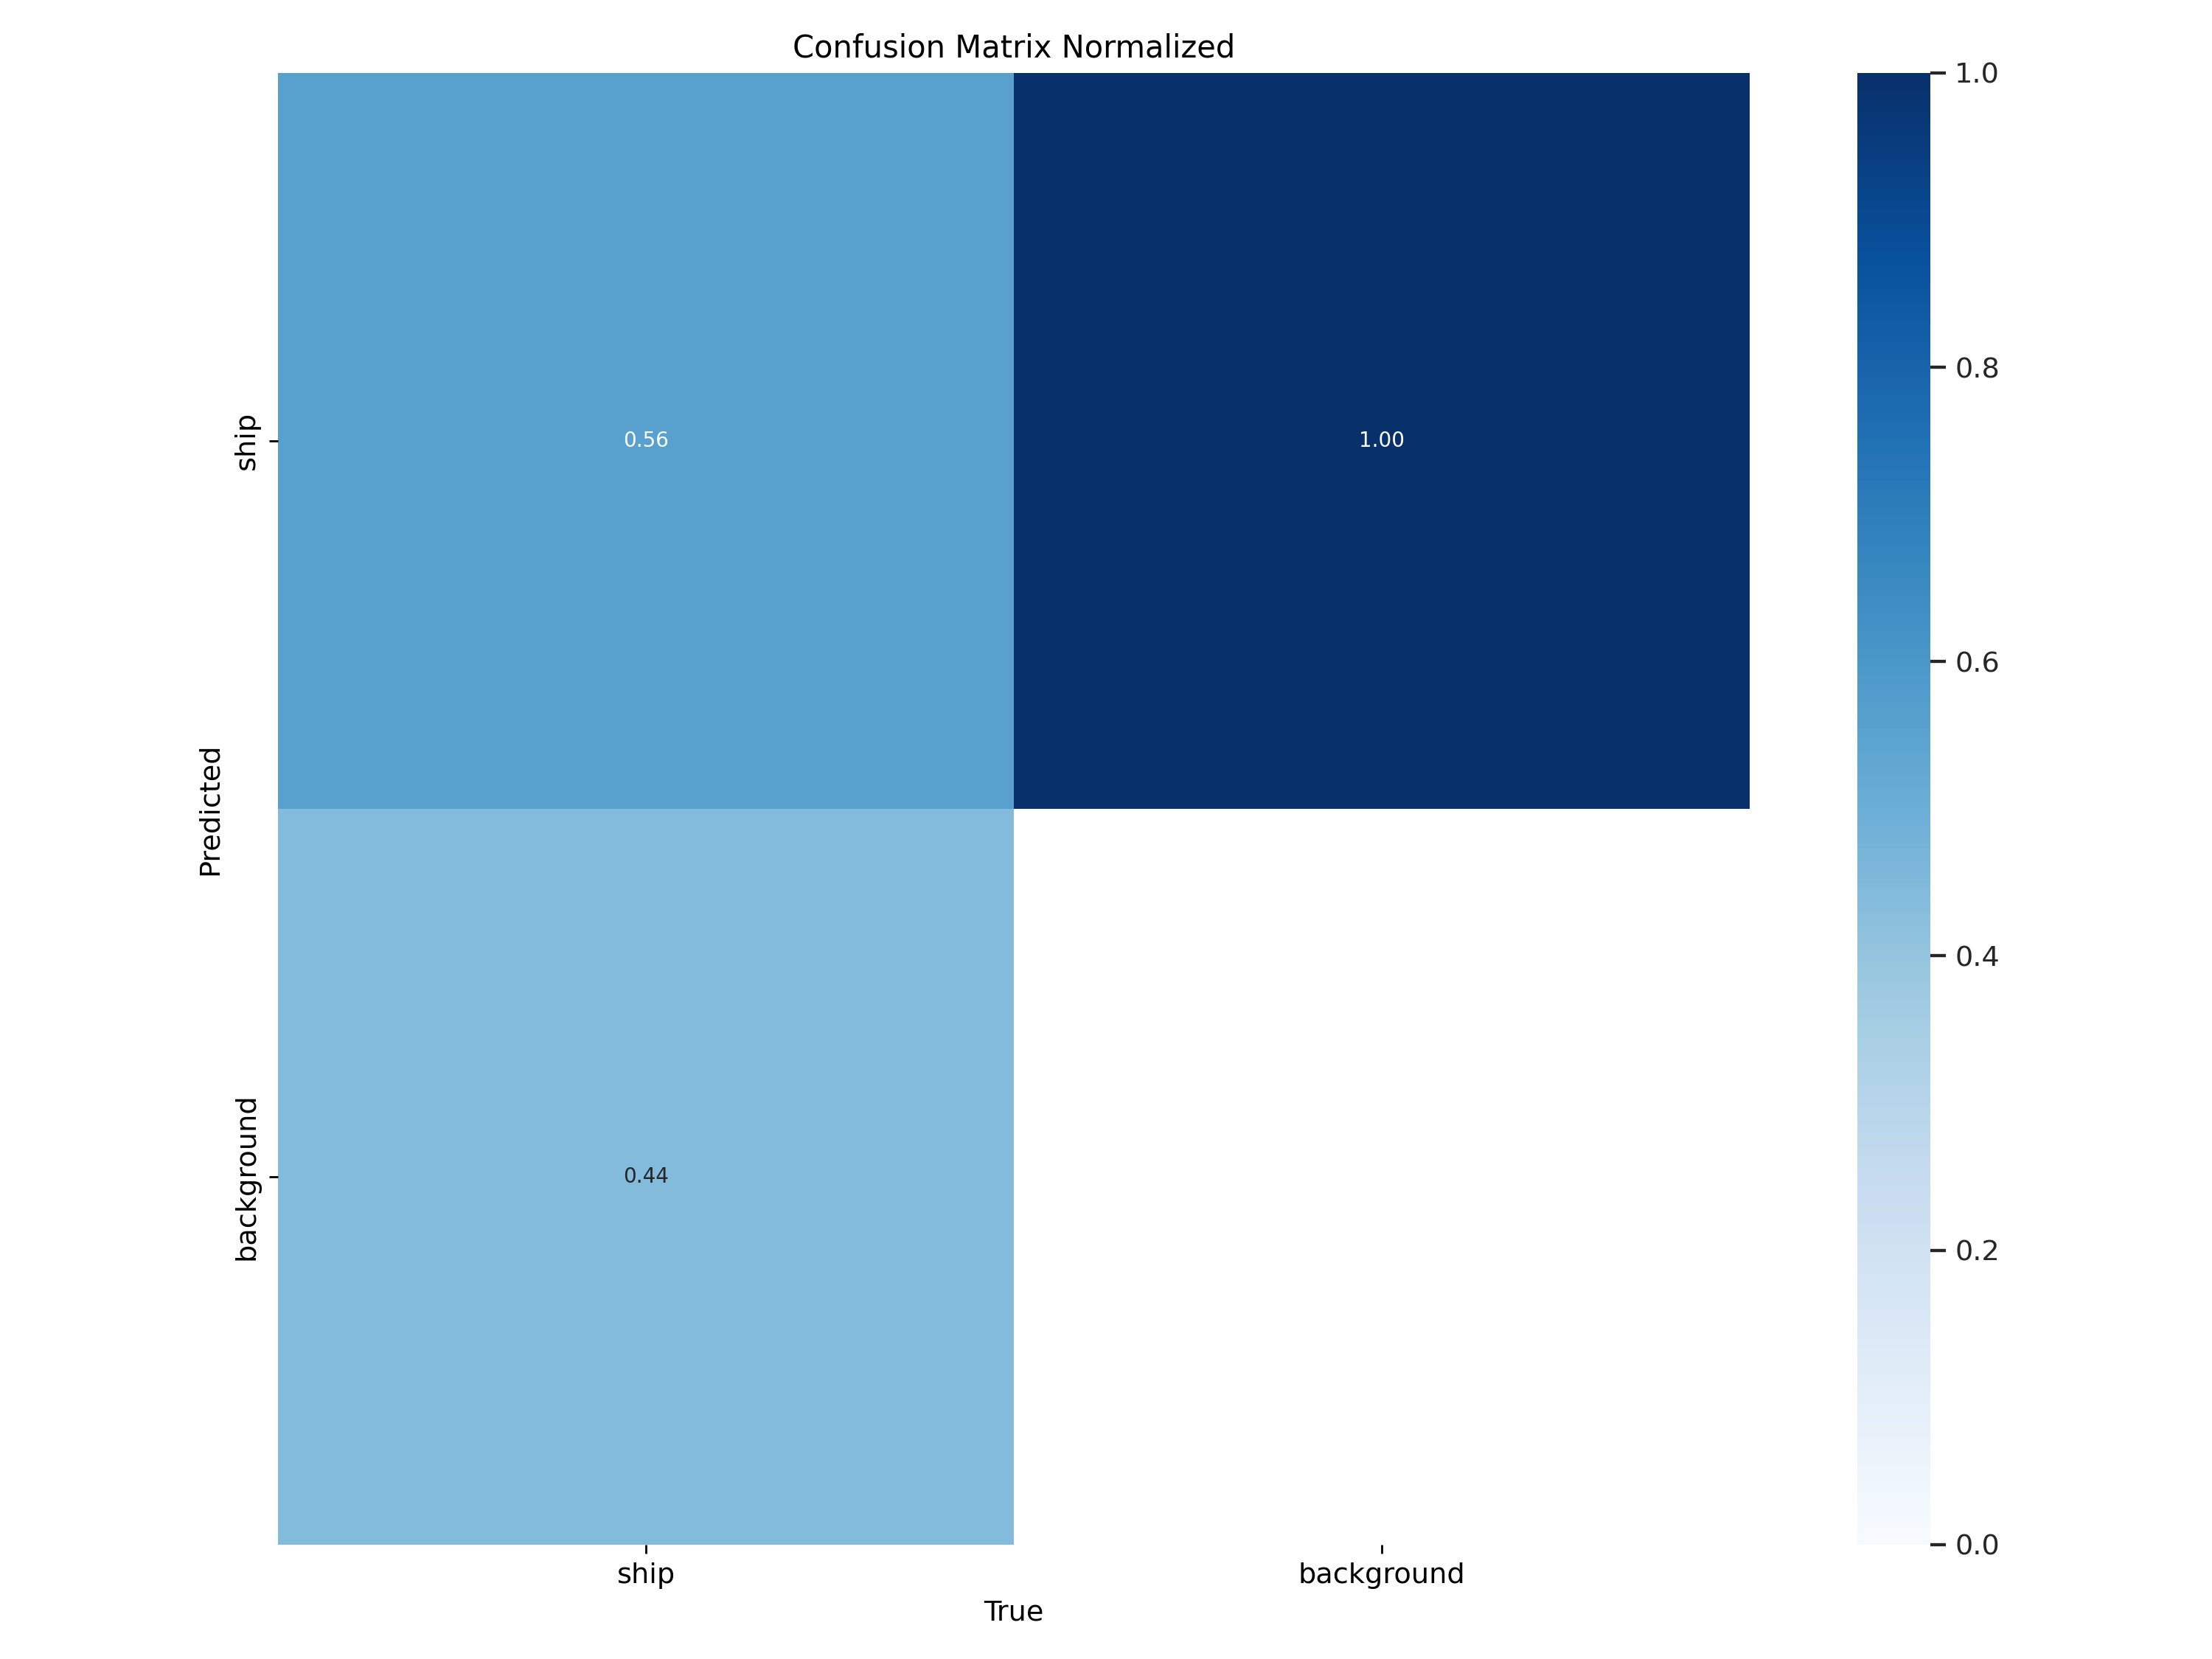

In [ ]:
from PIL import Image

img = Image.open('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png')
img

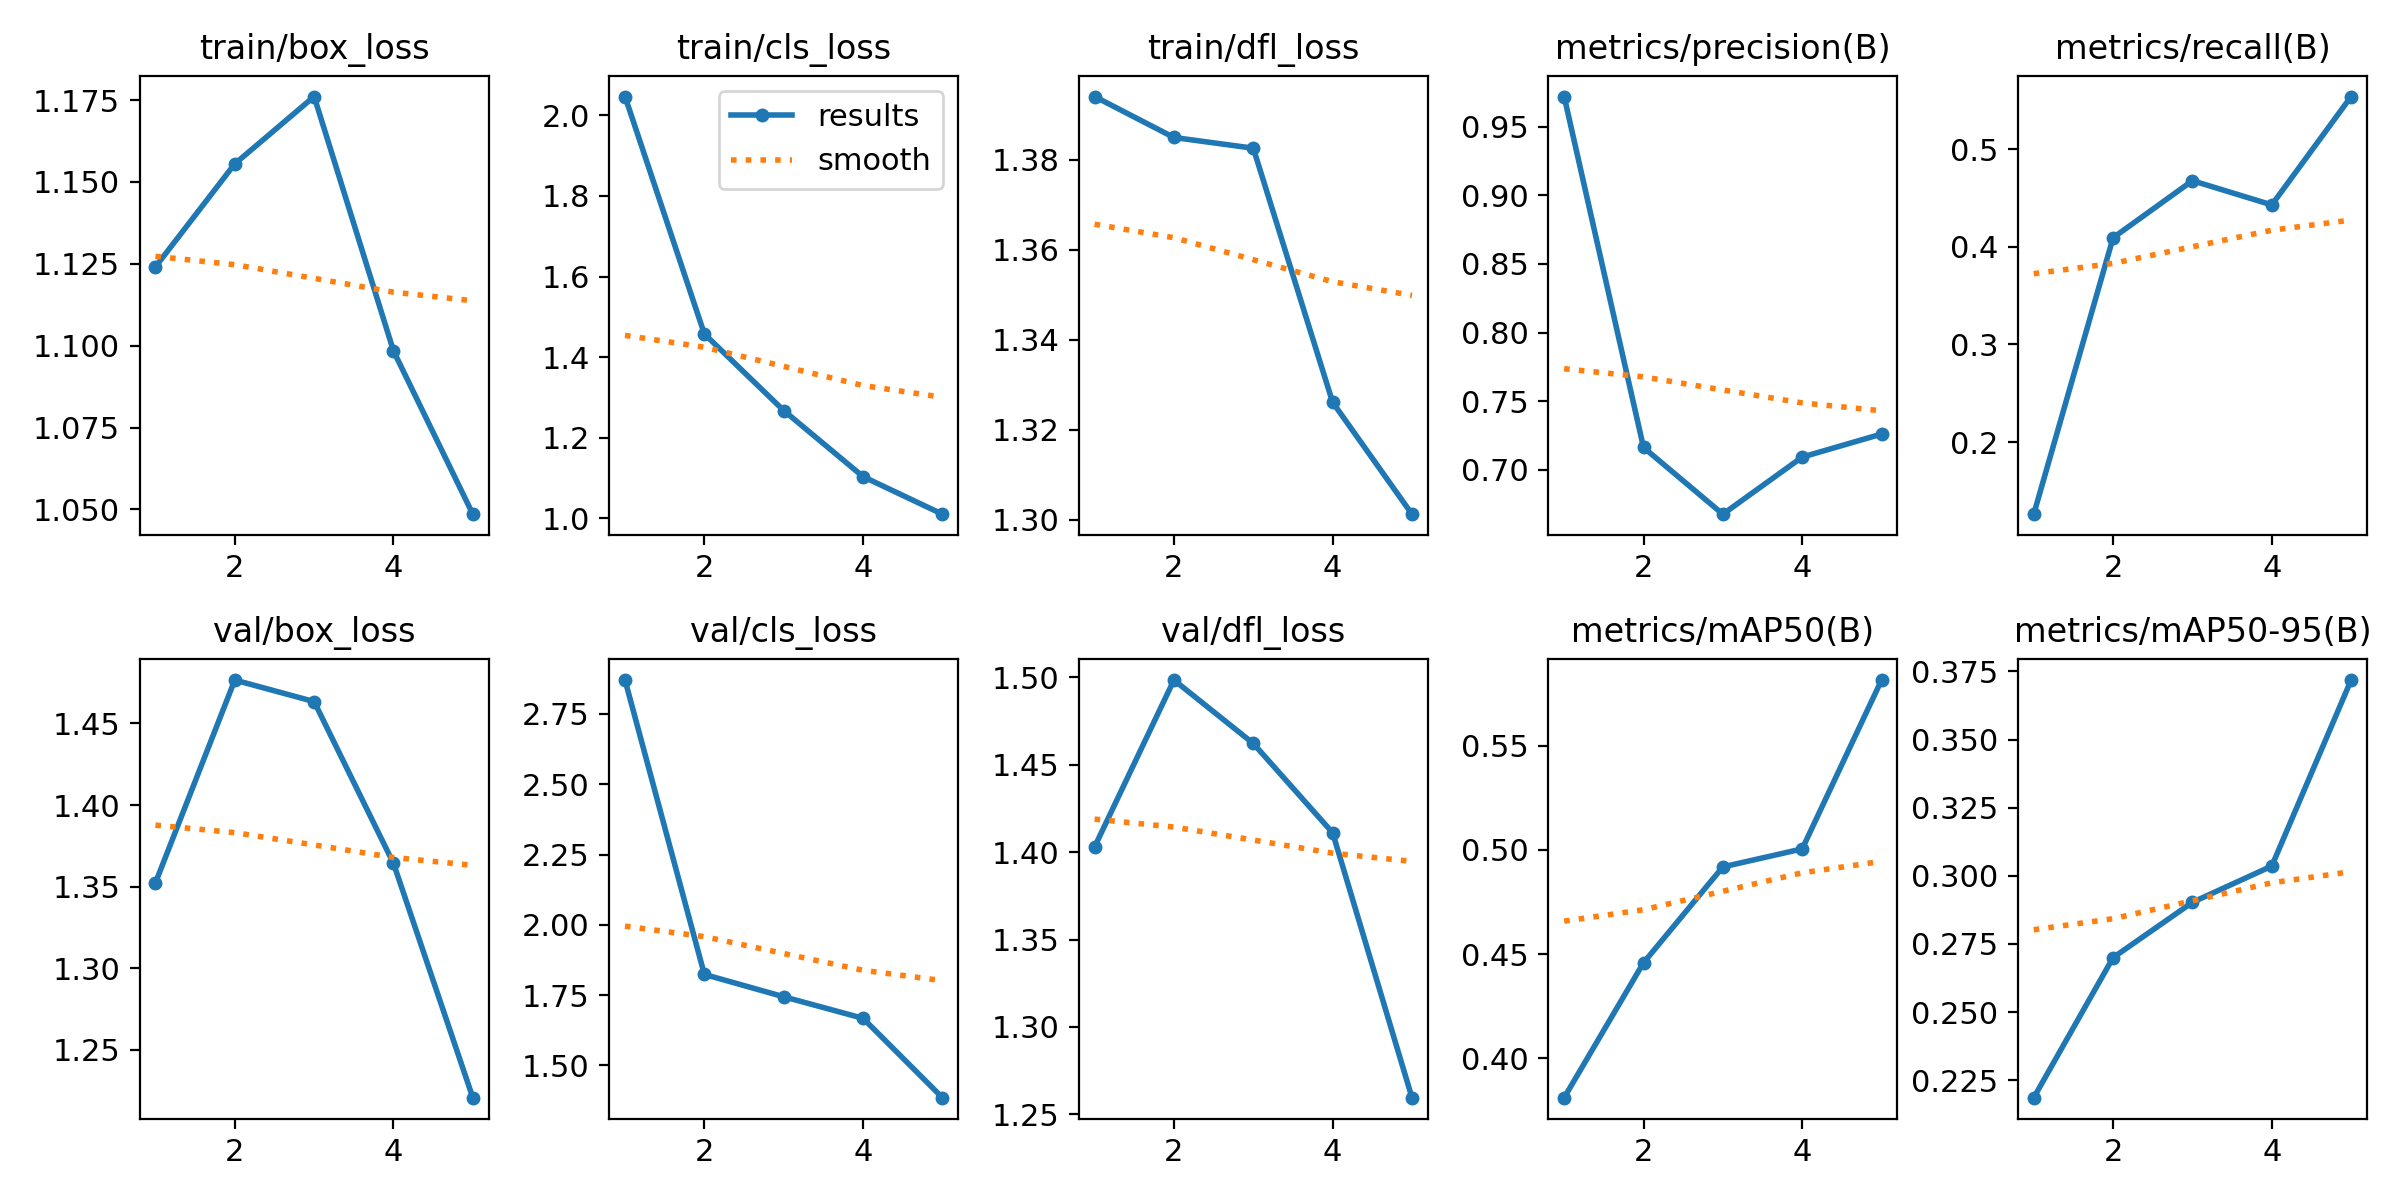

In [ ]:
img = Image.open('/kaggle/working/runs/detect/train/results.png')
img

In [ ]:
pt_model = YOLO("yolov8n.pt")

#training the model on my custom dataset
my_model = pt_model.train(data=os.path.join(ROOT_DIR, "/kaggle/input/boat-detection-v3i-yolov8/data.yaml"), epochs=25)

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/boat-detection-v3i-yolov8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

wandb: Currently logged in as: prasadvichare02 (prasadvichare02-4sake-esports). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /kaggle/input/boat-detection-v3i-yolov8/train/labels... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:02<00:00, 602.26it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/boat-detection-v3i-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/boat-detection-v3i-yolov8/valid/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 440.23it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/boat-detection-v3i-yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.35G      1.124      2.047      1.394         35        640: 100%|██████████| 94/94 [00:16<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        150        325      0.972      0.126      0.381      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.29G      1.203      1.475      1.413         32        640: 100%|██████████| 94/94 [00:15<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        150        325      0.506      0.415      0.343      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.27G      1.255      1.316      1.433         28        640: 100%|██████████| 94/94 [00:15<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        150        325       0.53      0.403      0.345      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.27G      1.197      1.142      1.385         28        640: 100%|██████████| 94/94 [00:15<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]

                   all        150        325      0.803      0.377      0.446       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.27G      1.189      1.068      1.385         22        640: 100%|██████████| 94/94 [00:15<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]

                   all        150        325      0.678      0.397      0.456      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.27G       1.16      1.023      1.362         34        640: 100%|██████████| 94/94 [00:15<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all        150        325      0.639      0.322      0.382      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.27G      1.142     0.9691      1.352         25        640: 100%|██████████| 94/94 [00:15<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all        150        325      0.768       0.44      0.524      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.27G      1.132     0.9835      1.348         24        640: 100%|██████████| 94/94 [00:15<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all        150        325      0.675        0.4      0.427      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.27G      1.123     0.9319      1.342         28        640: 100%|██████████| 94/94 [00:15<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        150        325      0.684      0.406      0.462       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.26G      1.085     0.9335      1.319         37        640: 100%|██████████| 94/94 [00:15<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.35it/s]

                   all        150        325      0.715      0.452      0.513      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.26G      1.085     0.9054      1.311         31        640: 100%|██████████| 94/94 [00:15<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]

                   all        150        325      0.827      0.351      0.458      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.26G      1.057     0.8855      1.293         28        640: 100%|██████████| 94/94 [00:15<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]

                   all        150        325       0.66      0.508      0.572       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.26G      1.053     0.8592      1.298         34        640: 100%|██████████| 94/94 [00:15<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all        150        325      0.778      0.409        0.5      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.26G      1.016     0.8516      1.273         23        640: 100%|██████████| 94/94 [00:15<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]

                   all        150        325      0.662      0.486      0.529      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.26G      1.009     0.8331      1.271         34        640: 100%|██████████| 94/94 [00:15<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]

                   all        150        325      0.819      0.477      0.593      0.397


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.27G     0.9577     0.7888      1.335         12        640: 100%|██████████| 94/94 [00:15<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]

                   all        150        325      0.737      0.475      0.579      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.27G     0.9441     0.7367      1.304         12        640: 100%|██████████| 94/94 [00:14<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]

                   all        150        325      0.742      0.428      0.517      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.27G     0.9367     0.7258      1.313         12        640: 100%|██████████| 94/94 [00:15<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]

                   all        150        325       0.77      0.474      0.583      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.27G     0.8888     0.6889      1.291         12        640: 100%|██████████| 94/94 [00:14<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.51it/s]

                   all        150        325      0.777      0.461       0.56      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.27G     0.9008     0.6841      1.296         12        640: 100%|██████████| 94/94 [00:15<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]

                   all        150        325       0.77      0.455       0.59      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.27G     0.8851     0.6552      1.263         13        640: 100%|██████████| 94/94 [00:14<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all        150        325      0.842       0.46      0.608      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.27G     0.8391     0.6273      1.245         12        640: 100%|██████████| 94/94 [00:14<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all        150        325      0.714      0.499      0.597      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.27G     0.8202     0.5956      1.218         12        640: 100%|██████████| 94/94 [00:14<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]

                   all        150        325       0.65      0.529      0.594      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.27G     0.8072     0.5836      1.216         12        640: 100%|██████████| 94/94 [00:15<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]

                   all        150        325      0.723      0.517      0.614      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.27G     0.8037     0.5645      1.215         12        640: 100%|██████████| 94/94 [00:14<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]

                   all        150        325      0.749      0.497      0.615      0.399



25 epochs completed in 0.123 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


                   all        150        325      0.746      0.495      0.615      0.399
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,▃▆██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
lr/pg1,▃▆██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
lr/pg2,▃▆██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
metrics/mAP50(B),▂▁▁▄▄▂▆▃▄▅▄▇▅▆▇▇▅▇▇▇██▇██
metrics/mAP50-95(B),▂▁▁▄▄▂▆▄▄▅▄▇▅▅█▇▆█▇▇██▇██
metrics/precision(B),█▁▁▅▄▃▅▄▄▄▆▃▅▃▆▄▅▅▅▅▆▄▃▄▅
metrics/recall(B),▁▆▆▅▆▄▆▆▆▇▅█▆▇▇▇▆▇▇▇▇▇██▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▆▇█▇▇▇▆▆▆▅▅▅▅▄▄▃▃▃▂▃▂▂▁▁▁


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


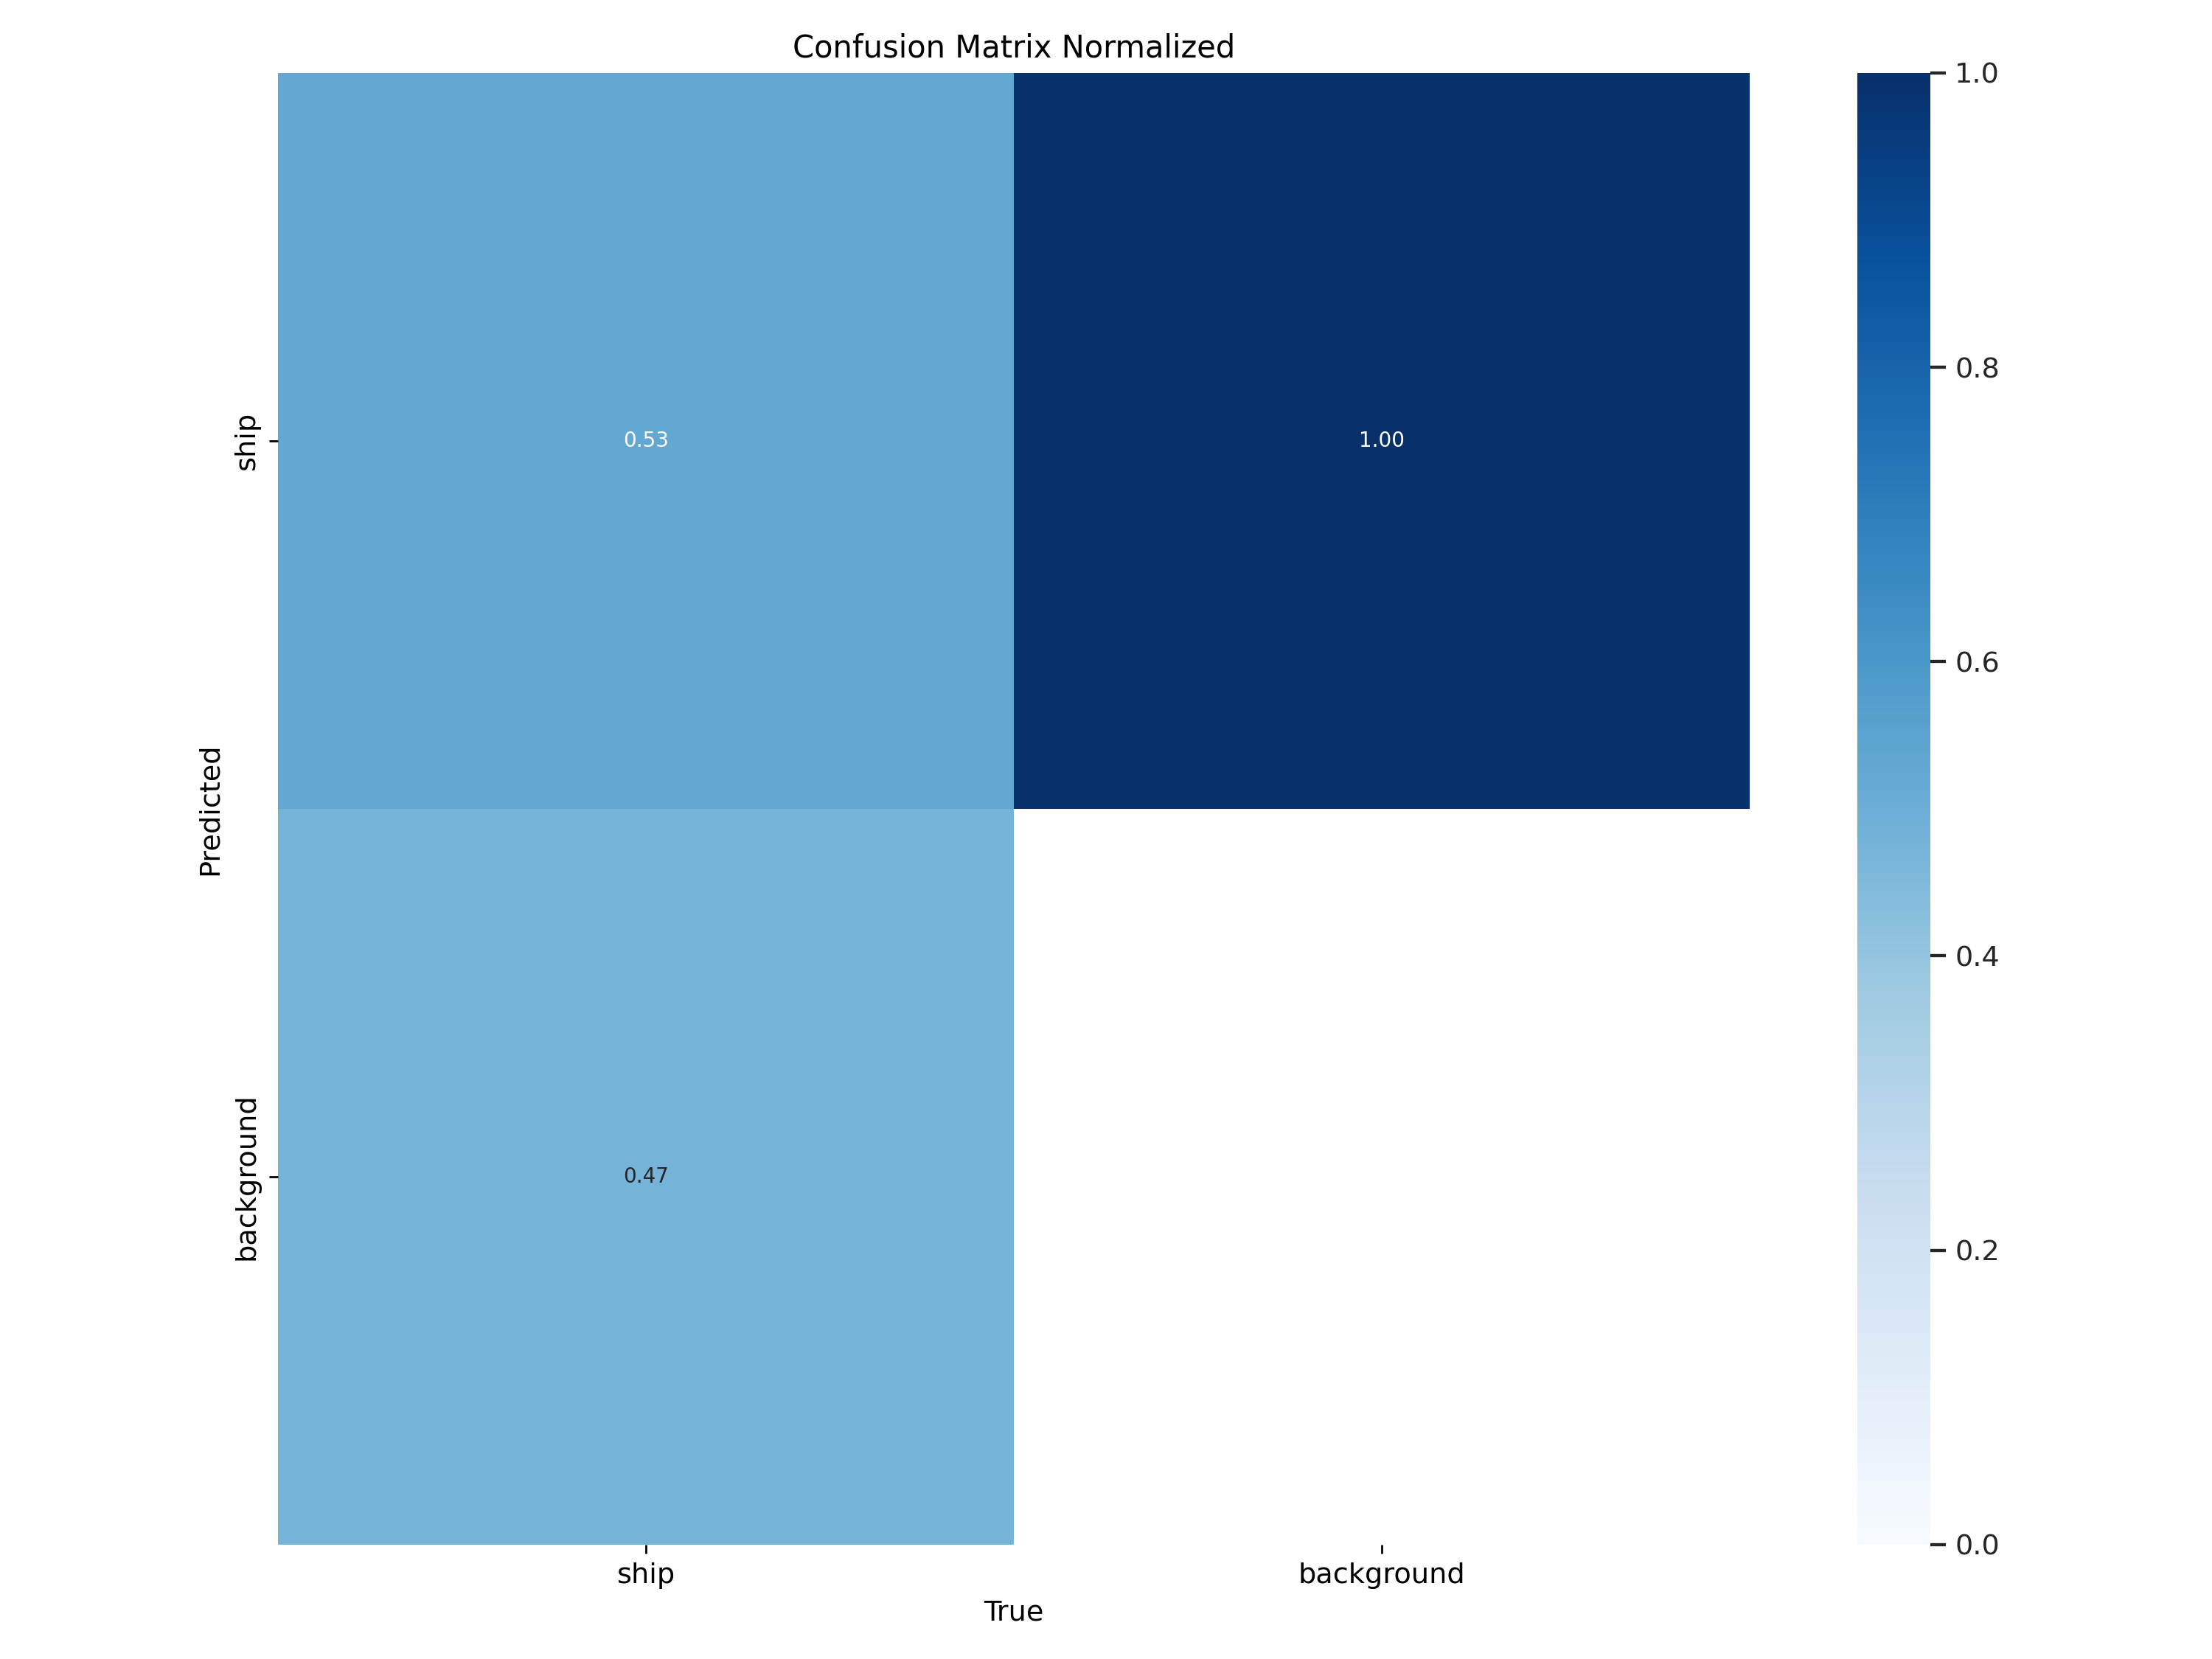

In [ ]:
from PIL import Image

# display the confusion matrix
img = Image.open('/kaggle/working/runs/detect/train2/confusion_matrix_normalized.png') # Use Image.open to open an image file.
img

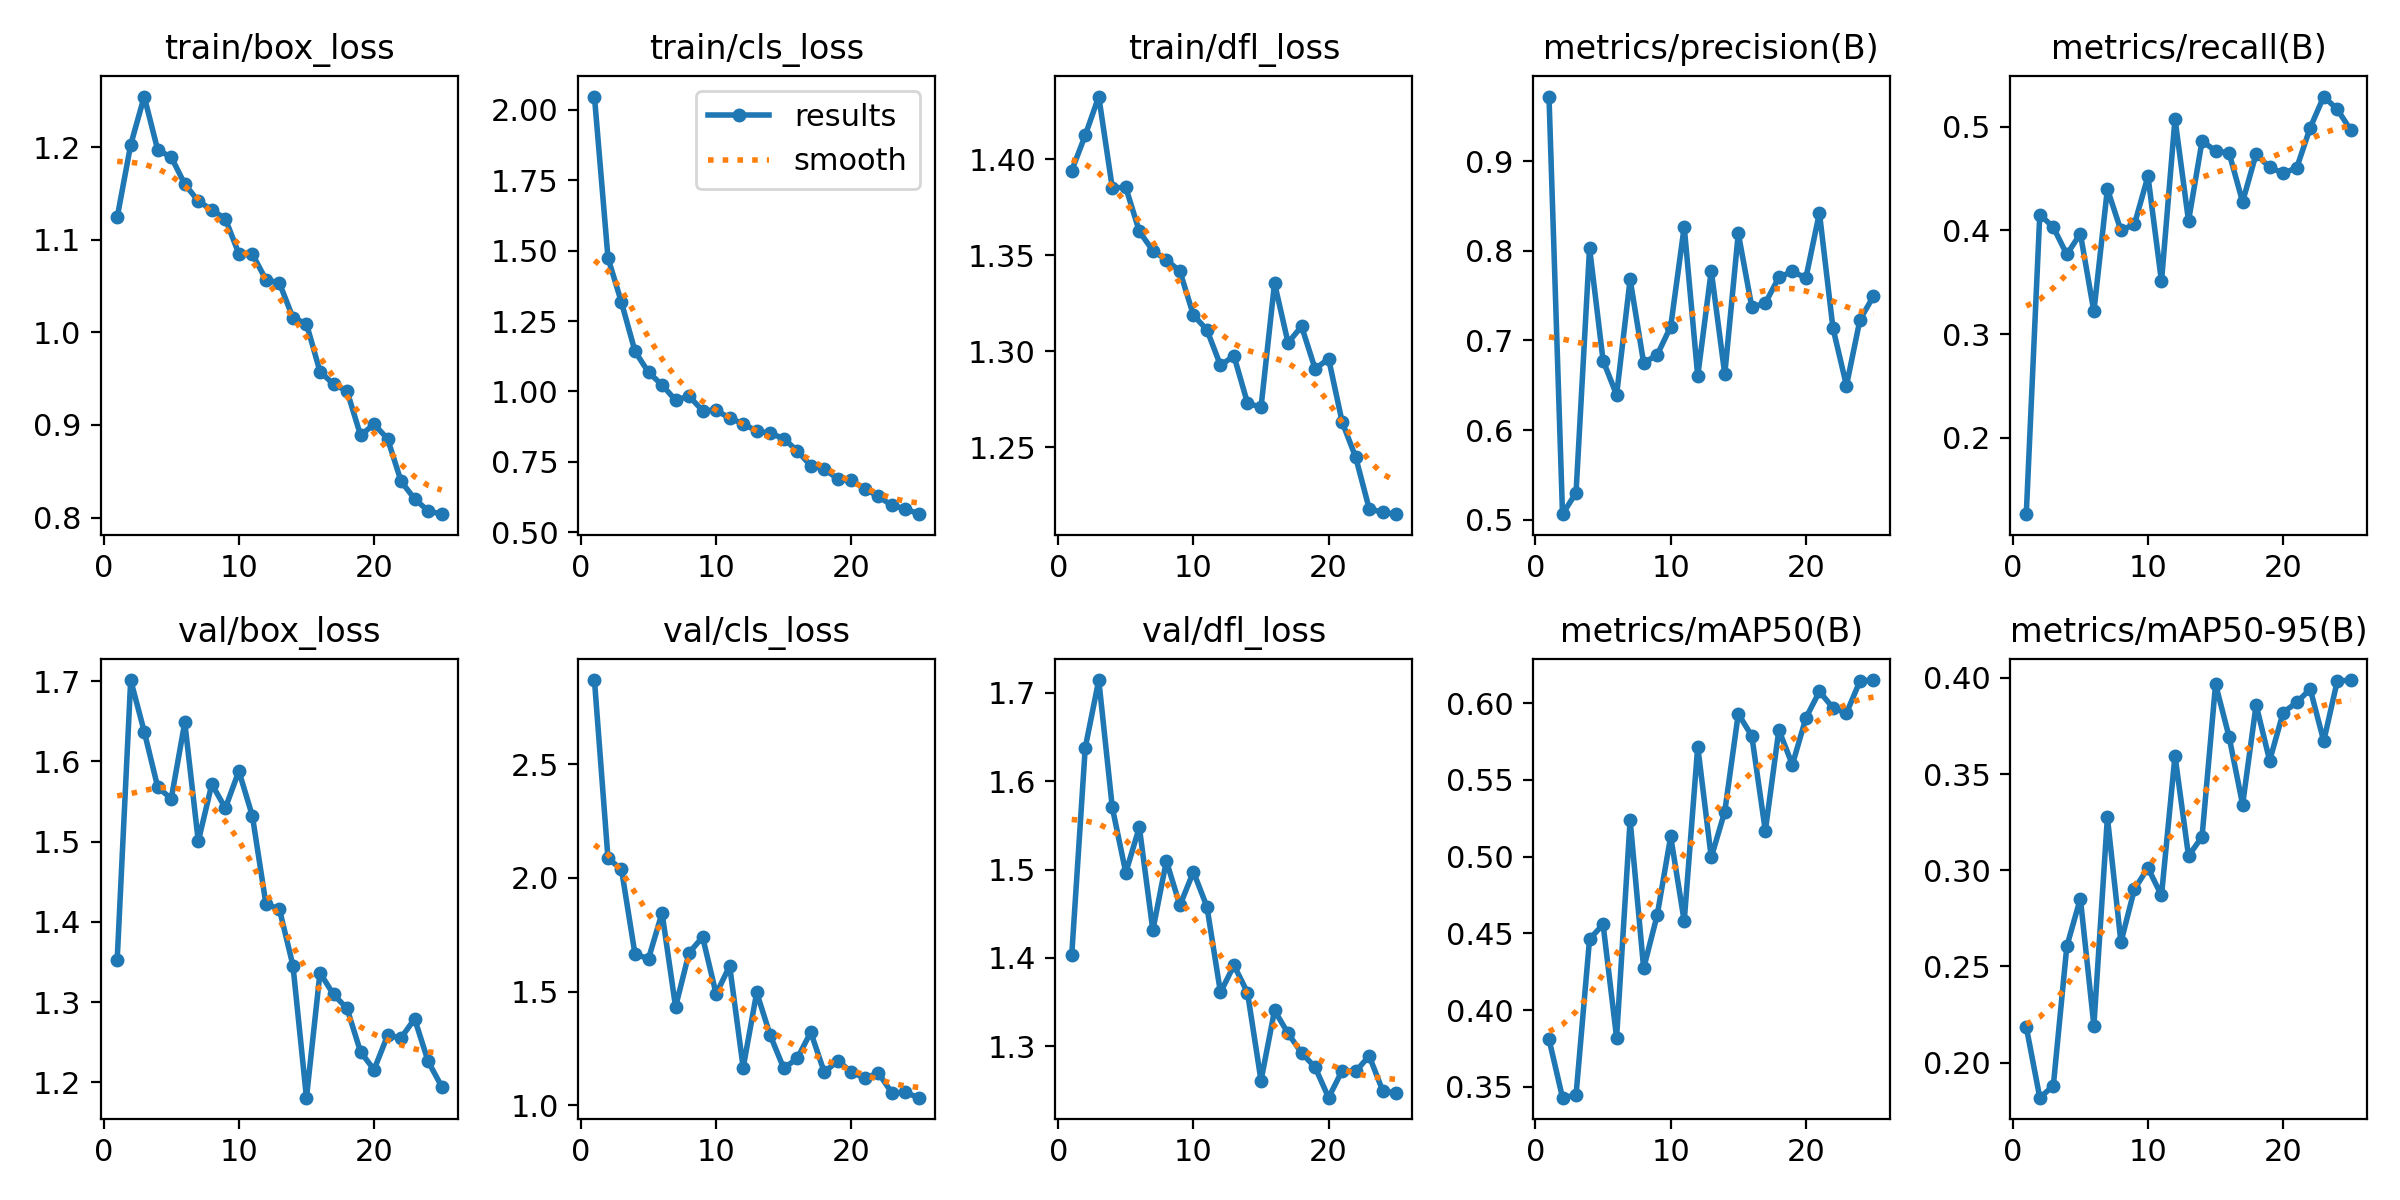

In [ ]:
# display the training results
img = Image.open('runs/detect/train2/results.png')
img

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train2/weights/best.pt source='/kaggle/input/ship-data/ship2.jpg'

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs

image 1/1 /kaggle/input/ship-data/ship2.jpg: 480x640 1 ship, 36.9ms
Speed: 3.4ms preprocess, 36.9ms inference, 156.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


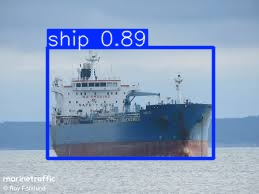

In [ ]:
from IPython.display import Image
# Import the Image class from the IPython.display module

display(Image(filename='/kaggle/working/runs/detect/predict2/ship2.jpg'))
# Call the Image class to display the image

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train2/weights/best.pt source='/kaggle/input/ship-data/ship3.jpg'

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs

image 1/1 /kaggle/input/ship-data/ship3.jpg: 480x640 1 ship, 41.5ms
Speed: 3.9ms preprocess, 41.5ms inference, 152.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


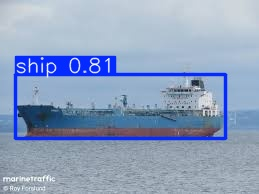

In [ ]:
from IPython.display import Image
# Import the Image class from the IPython.display module

display(Image(filename='/kaggle/working/runs/detect/predict3/ship3.jpg'))

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train2/weights/best.pt source='/kaggle/input/ship-data/ship4.jpg'

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs

image 1/1 /kaggle/input/ship-data/ship4.jpg: 320x640 1 ship, 40.6ms
Speed: 2.8ms preprocess, 40.6ms inference, 190.4ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


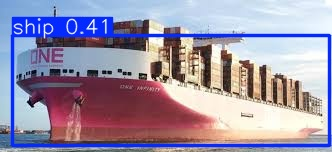

In [ ]:
from IPython.display import Image
# Import the Image class from the IPython.display module

display(Image(filename='/kaggle/working/runs/detect/predict4/ship4.jpg'))

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train2/weights/best.pt source='/kaggle/input/ship-data/ship5.jpg'

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs

image 1/1 /kaggle/input/ship-data/ship5.jpg: 416x640 2 ships, 36.5ms
Speed: 3.5ms preprocess, 36.5ms inference, 154.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


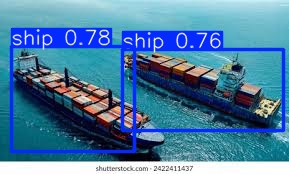

In [ ]:
from IPython.display import Image
# Import the Image class from the IPython.display module

display(Image(filename='/kaggle/working/runs/detect/predict5/ship5.jpg'))

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train2/weights/best.pt source='/kaggle/input/ship2data/ships6.jpg'

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs

image 1/1 /kaggle/input/ship2data/ships6.jpg: 384x640 2 ships, 36.9ms
Speed: 3.8ms preprocess, 36.9ms inference, 153.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


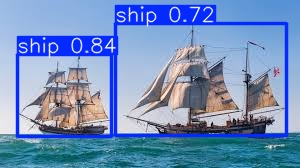

In [ ]:
from IPython.display import Image
# Import the Image class from the IPython.display module

display(Image(filename='/kaggle/working/runs/detect/predict6/ships6.jpg'))

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train2/weights/best.pt source='/kaggle/input/ship2data/ships7.jpg'

Ultralytics 8.3.16 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs

image 1/1 /kaggle/input/ship2data/ships7.jpg: 448x640 3 ships, 36.3ms
Speed: 3.3ms preprocess, 36.3ms inference, 176.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


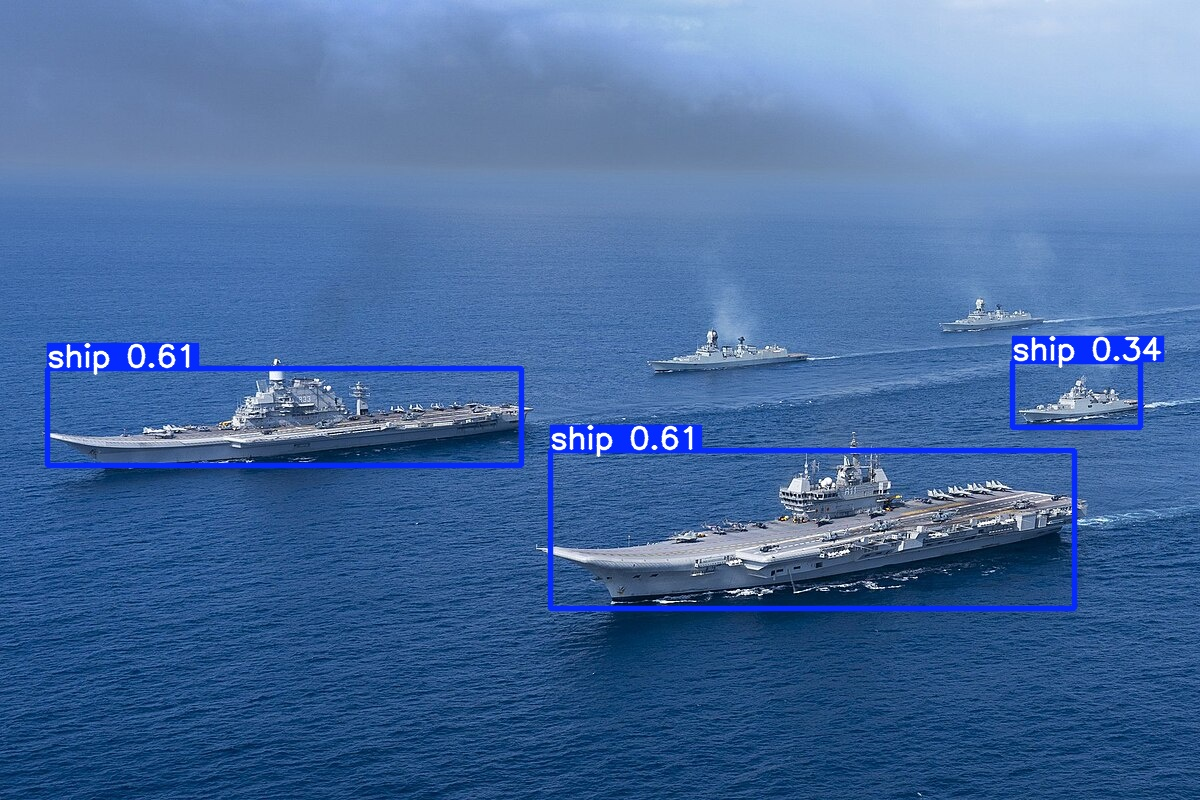

In [ ]:
from IPython.display import Image
# Import the Image class from the IPython.display module

display(Image(filename='/kaggle/working/runs/detect/predict7/ships7.jpg'))